<a href="https://colab.research.google.com/github/kunsangk/PHSX216N.02-Autumn/blob/main/PHSXfastRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

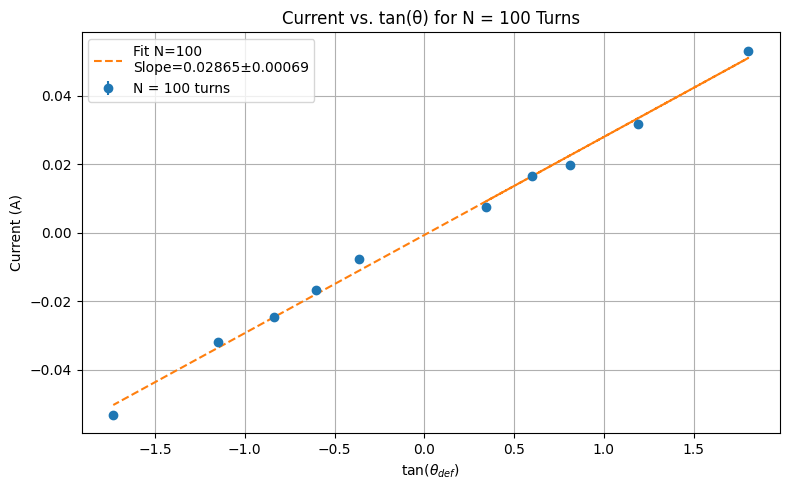

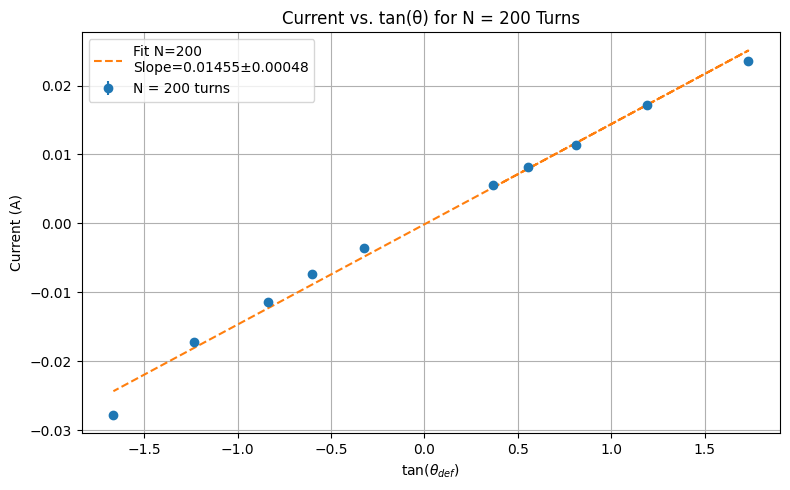

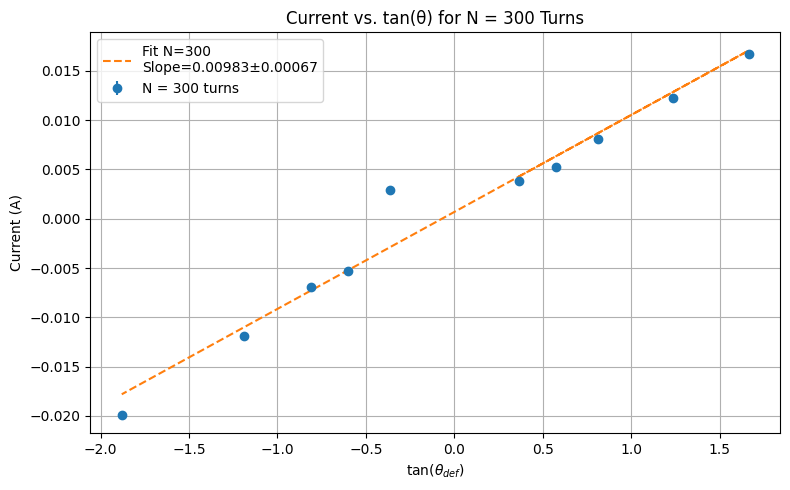

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


theta_deg_100 = np.array([19, 31, 39, 50, 61, -20, -31, -40, -49, -60])
theta_deg_200 = np.array([20, 29, 39, 50, 60, -18, -31, -40, -51, -59])
theta_deg_300 = np.array([20, 30, 39, 51, 59, -20, -31, -39, -50, -62])

current_100_turns = np.array([0.00755, 0.01659, 0.0199, 0.0318, 0.0532,
                           -0.00753, -0.01659, -0.0245, -0.0318, -0.0532])
current_200_turns = np.array([0.00564, 0.00819, 0.01141, 0.01724, 0.0235,
                           -0.00362, -0.00741, -0.01138, -0.01721, -0.0278])
current_300_turns = np.array([0.00379, 0.00529, 0.00806, 0.01223, 0.0167,
                              0.00292, -0.0053, -0.00693, -0.01187, -0.0199])

# Uncertainties
uncertainty_100 = np.full_like(current_100_turns, 0.00001)
uncertainty_200 = np.full_like(current_200_turns, 0.00001)
uncertainty_300 = np.full_like(current_300_turns, 0.00001)

# Calculate tan(theta)
tan_theta_100 = np.tan(np.radians(theta_deg_100))
tan_theta_200 = np.tan(np.radians(theta_deg_200))
tan_theta_300 = np.tan(np.radians(theta_deg_300))

# Linear fit function
def linear_fit(x, m, b):
    return m * x + b

def plot_data(tan_theta, current, uncertainty, N_turns):
    plt.figure(figsize=(8, 5))
    plt.errorbar(tan_theta, current, yerr=uncertainty, fmt='o', label=f'N = {N_turns} turns')
    popt, pcov = curve_fit(linear_fit, tan_theta, current)
    slope, intercept = popt
    slope_uncertainty = np.sqrt(np.diag(pcov))[0]
    plt.plot(tan_theta, linear_fit(tan_theta, *popt), '--', label=f'Fit N={N_turns}\nSlope={slope:.5f}±{slope_uncertainty:.5f}')
    plt.xlabel(r'$\tan(\theta_{def})$')
    plt.ylabel('Current (A)')
    plt.title(f'Current vs. tan(θ) for N = {N_turns} Turns')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'magnetic_field_plot_N_{N_turns}.png', dpi=300)
    plt.show()

plot_data(tan_theta_100, current_100_turns, uncertainty_100, 100)
plot_data(tan_theta_200, current_200_turns, uncertainty_200, 200)
plot_data(tan_theta_300, current_300_turns, uncertainty_300, 300)
